<a href="https://colab.research.google.com/github/Lohithl27/localrepo/blob/main/CNN_R%26AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

## Install and Import Libraries

In [ ]:
# Install OpenCV
!pip install opencv-python --quiet


In [ ]:
# Import all necessary libraries

# cv2: OpenCV, used to read and manipulate images.
import cv2  # For image processing

import numpy as np  # For number operations

import matplotlib.pyplot as plt  # For displaying images

# Helps us create and train the CNN.
import tensorflow as tf  # For building the CNN

from tensorflow.keras import layers, models  # For CNN layers and models

## Load and Prepare the MNIST Dataset

In [ ]:
# Load MNIST data directly from TensorFlow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values (from 0-255 to 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Add an extra dimension to represent the channel (grayscale = 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Print shapes to verify
print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (60000, 28, 28, 1)
Test Data Shape: (10000, 28, 28, 1)


## Visualize the Training Data

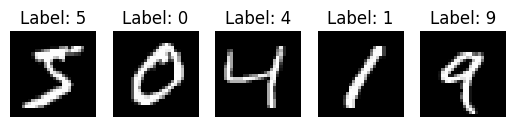

In [ ]:
# Display 5 sample images from training data
for i in range(5):
    img = X_train[i].reshape(28, 28)  # Remove channel to display
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Shows 5 digits from the training dataset.
# Each image is 28x28 grayscale, label printed as title.

## Build a Simple CNN Model

In [ ]:
# Create a Sequential CNN model
model = models.Sequential([
    # 1st Convolution Layer: 32 filters, 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Max Pooling to reduce size
    layers.MaxPooling2D((2, 2)),

    # 2nd Convolution Layer: more filters
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Max Pooling again
    layers.MaxPooling2D((2, 2)),

    # Flatten image to 1D array
    layers.Flatten(),

    # Dense layer: learn features
    layers.Dense(64, activation='relu'),

    # Output layer: 10 neurons (for 10 digits)
    layers.Dense(10, activation='softmax')
])

# Show model structure
model.summary()

# CNN learns features from images.

# Conv2D: Detects patterns like edges, curves.

# MaxPooling2D: Shrinks image but keeps important info.

# Flatten: Converts to 1D for fully connected layers.

# Dense: Regular neural layers for decision making.

# Softmax: Gives probabilities for each digit (0 to 9).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and Train the CNN

In [ ]:
# Compile the model (choose optimizer and loss function)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on training data
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)


# adam: Efficient optimizer.

# sparse_categorical_crossentropy: For class labels.

# epochs=5: Run through all training data 5 times.


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.8989 - loss: 0.3207 - val_accuracy: 0.9832 - val_loss: 0.0575
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9841 - loss: 0.0529 - val_accuracy: 0.9858 - val_loss: 0.0479
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9886 - loss: 0.0340 - val_accuracy: 0.9875 - val_loss: 0.0491
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9925 - loss: 0.0222 - val_accuracy: 0.9898 - val_loss: 0.0336
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9941 - loss: 0.0173 - val_accuracy: 0.9888 - val_loss: 0.0409


## Evaluate the Model

In [ ]:
# Test model on unseen data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9860 - loss: 0.0442
Test Accuracy: 0.9888


## Predict and Display Model Output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


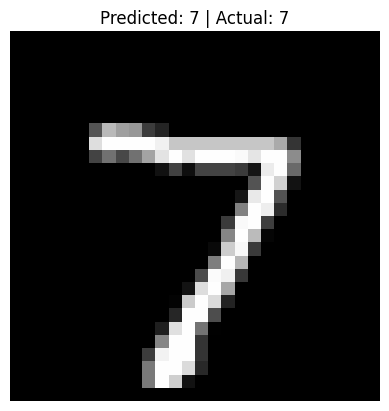

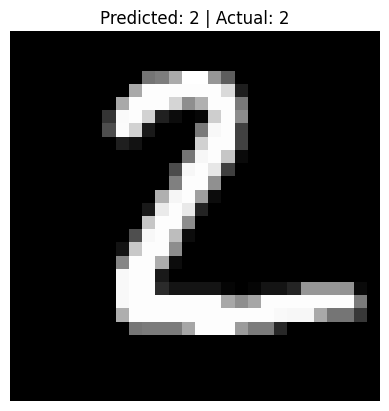

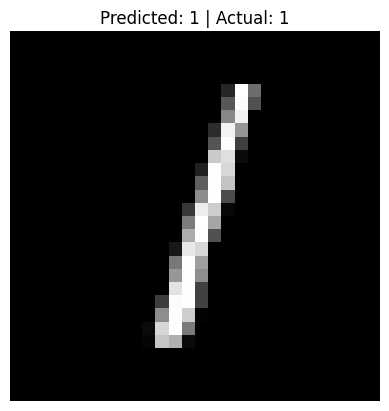

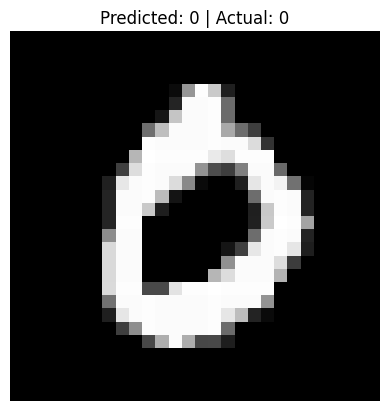

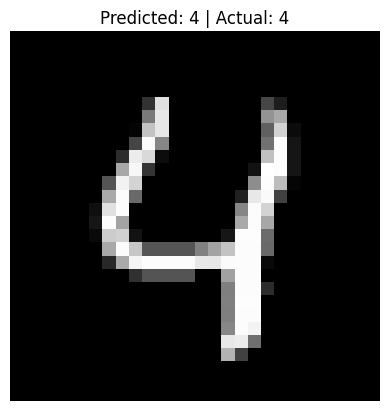

In [ ]:
# Predict first 5 test images
predictions = model.predict(X_test[:5])

# Show predicted vs actual
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])} | Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()

# model.predict() returns a probability array for each class (0–9).
# np.argmax() picks the class with the highest score.
